In [1]:
import numpy as np
import matplotlib.pyplot as plt

import moduloPaper as mod
import plt_conf as conf  # modulo de configuración de gráfico

from scipy.interpolate import interp1d 
from scipy.optimize import fsolve
from matplotlib import colormaps, colors, cm

In [2]:
conf.general()  # cargando configuración general

In [3]:
# galaxia

KMGal = np.loadtxt('data/dataAngMatheKottlerGal.dat', unpack=True)
KSerGal = np.loadtxt('data/dataAngSerKottlerGal.dat', unpack=True)

HangN = np.loadtxt('dataH/dataAngMatheHordGal.dat', unpack=True)
HangS = np.loadtxt('dataH/dataAngSerMatheHordGal.dat', unpack=True)

ScangN = np.loadtxt('dataH/dataAngMatheScGal.dat', unpack=True)
ScangS = np.loadtxt('dataH/dataAngSerMatheScGal.dat', unpack=True)

L0 = np.loadtxt('dataH/dataAngSerMatheScGalL0.dat', unpack=True)
L48 = np.loadtxt('dataH/dataAngSerMatheScGalLm48.dat', unpack=True)
L50 = np.loadtxt('dataH/dataAngSerMatheScGalLm50.dat', unpack=True)
L52 = np.loadtxt('dataH/dataAngSerMatheScGalLm52.dat', unpack=True)

In [49]:
np.abs(FL52(ptos)-FL0(ptos))[-2]/(np.abs(KMGal[1]-KSerGal[1])*fac)[-1]



2.8693979280145134

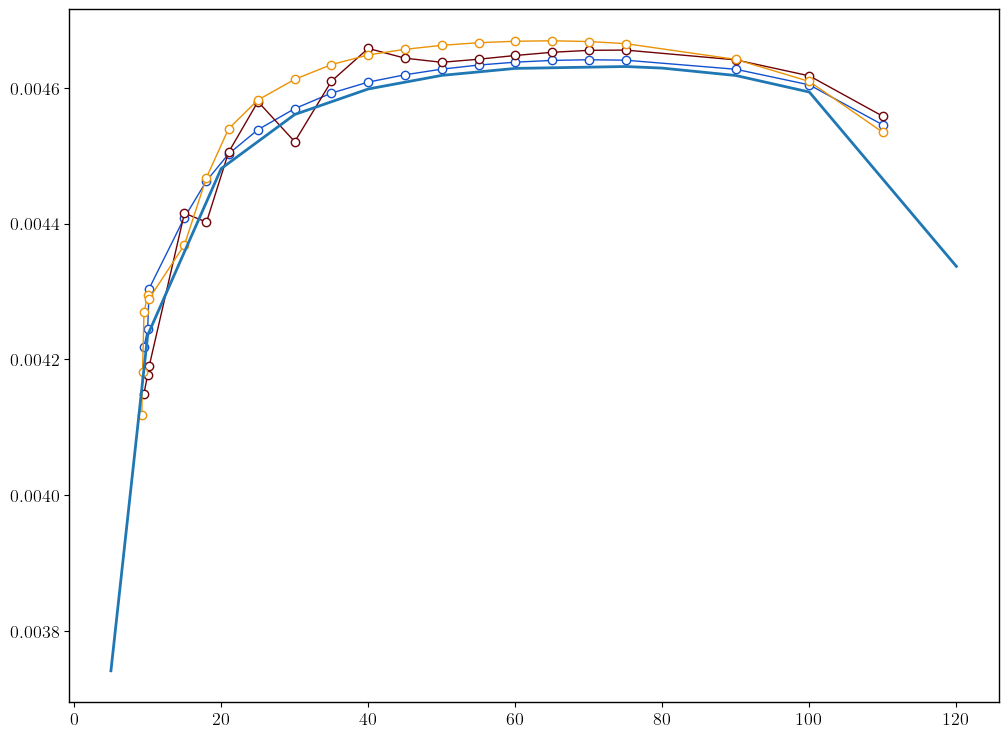

In [4]:
fac = 206265

FL0 = interp1d(L0[0], L0[1]*fac, kind='quadratic')
FL48 = interp1d(L48[0], L48[1]*fac, kind='quadratic')
FL50 = interp1d(L50[0], L50[1]*fac, kind='quadratic')
FL52 = interp1d(L52[0], L52[1]*fac, kind='quadratic')


ptos = [9.5, 10., 10.2, 15., 18., 21., 25., 30., 35., 40., 45, 50, 55, 60, 65, 70, 75, 90, 100, 110]
plt.plot(ptos,  np.abs(FL48(ptos)-FL0(ptos)), ls='-', lw=1, mfc='white', marker='o', c='#1151d1',
           label=r'$\Lambda = 10^{-48} \mathrm{m}^2$')

ptos = [9.5, 10., 10.2, 15., 18., 21., 25., 30., 35., 40., 45, 50, 55, 60, 65, 70, 75, 90, 100, 110]
plt.plot(ptos,  np.abs(FL50(ptos)-FL0(ptos))*1e02, ls='-', lw=1, mfc='white', marker='o', c='#6e0206',
           label=r'$\Lambda = 10^{-50} \mathrm{m}^2\;\;(\times10^{-2})$')

ptos = [9.2, 9.3, 9.5, 10., 10.2, 15., 18., 21., 25., 30., 35., 40., 45, 50, 55, 60, 65, 70, 75, 90, 100, 110]
plt.plot(ptos,  np.abs(FL52(ptos)-FL0(ptos))*1e04, ls='-', lw=1, mfc='white', marker='o', c='#eb9205',
           label=r'$\Lambda = 10^{-52} \mathrm{m}^2 \;\;(\times10^{-4})$')

plt.plot(KMGal[0], np.abs(KMGal[1]-KSerGal[1])*fac*2.7e04)

Text(56.5, 1.96570545, '$b_{1}=7\\times 10^{11}\\,\\mathrm{R}_\\odot$')

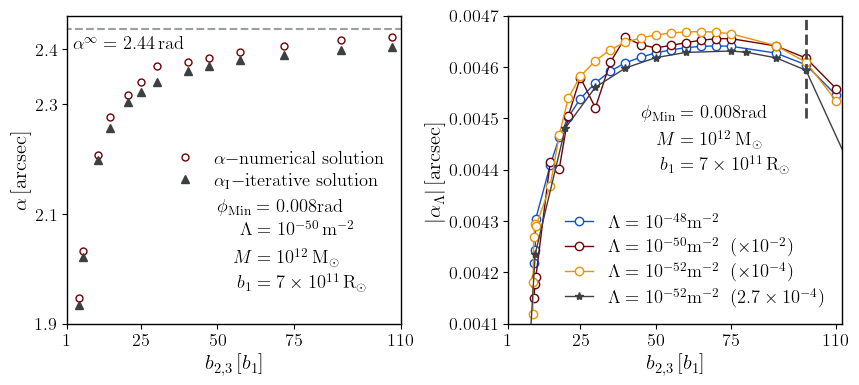

In [5]:
col = ['#3d4040', '#1151d1', '#f24f0a', '#fabc02', '#046e02', '#6e0206']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.32))

#############
Msun = 1.9885e30  # kg 
G = 6.674e-11  # m^3/(kg s^2)
c = 299792458  # m/s
Rsun = 6.96e08  # m

ang = lambda M, G, c, b: 4*G*M/(c**2*b)
fac = 206265
##############
b0 = 5e20
yval = ang(1e12*Msun, G, c, b0)

ax[0].hlines(y=yval*fac, xmin=0, xmax=200, ls='--', lw=1.5, color='#9c9fa1')
ax[0].plot(HangN[0], HangN[1]*fac, marker='o', markersize=5, mfc='white',
           ls='', c='#6e0206', label=r'$\alpha-$numerical solution')
ax[0].plot(HangS[0], HangS[1]*fac, marker='^', ls='', c='#3d4040', 
           label=r'$\alpha_{\mathrm{I}}-$iterative solution')

#ax[0].plot(ScangN[0], ScangN[1]*fac, ls='', marker='v')
#ax[0].plot(ScangS[0], ScangS[1]*fac, ls='-', c='#3d4040', alpha=0.3)

ax[0].set_xlim(1.0, 110)
ax[0].set_xlabel(r'$b_{2,3}\,[b_{1}]$')
ax[0].set_ylabel(r'$\alpha\, [\mathrm{arcsec}]$')

temp = yval*fac
ax[0].text(3, temp-0.035, r'$\alpha^{\infty}=%3.2f\, \mathrm{rad}$'%temp, fontsize='small' )



ax[0].set_xticks([1, 25, 50, 75, 110]);
ax[0].set_yticks([1.9, 2.1, 2.3, 2.4]);
ax[0].legend(loc='center right', frameon=False, fontsize='small', labelspacing=0.3)


###

FL0 = interp1d(L0[0], L0[1]*fac, kind='quadratic')
FL48 = interp1d(L48[0], L48[1]*fac, kind='quadratic')
FL50 = interp1d(L50[0], L50[1]*fac, kind='quadratic')
FL52 = interp1d(L52[0], L52[1]*fac, kind='quadratic')

ptos = [9.5, 10., 10.2, 15., 18., 21., 25., 30., 35., 40., 45, 50, 55, 60, 65, 70, 75, 90, 100, 110]
ax[1].plot(ptos,  np.abs(FL48(ptos)-FL0(ptos)), ls='-', lw=1, mfc='white', marker='o', c='#1151d1',
           label=r'$\Lambda = 10^{-48} \mathrm{m}^{-2}$')

ptos = [9.5, 10., 10.2, 15., 18., 21., 25., 30., 35., 40., 45, 50, 55, 60, 65, 70, 75, 90, 100, 110]
ax[1].plot(ptos,  np.abs(FL50(ptos)-FL0(ptos))*1e02, ls='-', lw=1, mfc='white', marker='o', c='#6e0206',
           label=r'$\Lambda = 10^{-50} \mathrm{m}^{-2}\;\;(\times10^{-2})$')

ptos = [9.2, 9.3, 9.5, 10., 10.2, 15., 18., 21., 25., 30., 35., 40., 45, 50, 55, 60, 65, 70, 75, 90, 100, 110]
ax[1].plot(ptos,  np.abs(FL52(ptos)-FL0(ptos))*1e04, ls='-', lw=1, mfc='white', marker='o', c='#eb9205',
           label=r'$\Lambda = 10^{-52} \mathrm{m}^{-2} \;\;(\times10^{-4})$')

ax[1].plot(KMGal[0], np.abs(KMGal[1]-KSerGal[1])*fac*2.7e04, ls='-', lw=1,
           marker='*', c='#3d4040', label=r'$\Lambda = 10^{-52} \mathrm{m}^{-2} \;\;(2.7\times10^{-4})$')

#ax[1].set_yscale('log')

ax[1].legend(loc='lower right', frameon=False, fontsize='small', labelspacing=0.3)

ax[1].set_xlim(5.0, 112)
ax[1].set_ylim(0.0041, 0.0047)

ax[1].set_xlabel(r'$b_{2,3}\,[b_{1}]$')
ax[1].set_ylabel(r'$|\alpha_{\Lambda}|\, [\mathrm{arcsec}]$')

ax[1].text(x=45, y=0.0045, s=r'$\phi_{\mathrm{Min}}=0.008$rad', fontsize='small')
ax[1].text(x=50, y=0.00445, s=r'$M=10^{12}\,\mathrm{M}_\odot$', fontsize='small', rotation='horizontal')
ax[1].text(x=51.5, y=0.0044, s=r'$b_{1}=7\times 10^{11}\,\mathrm{R}_\odot$', 
           fontsize='small', rotation='horizontal')

ax[1].set_xticks([1, 25, 50, 75, 110]);

ax[1].vlines(x=100, ymin=0.0045, ymax=0.0047, ls='--', color='#434447')


ax[0].text(x=50, y=1.02e-5*fac, s=r'$\phi_{\mathrm{Min}}=0.008$rad', fontsize='small')
ax[0].text(x=57.5, y=1.0e-5*fac, s=r'$\Lambda=10^{-50}\, \mathrm{m}^{-2}$', 
           fontsize='small', rotation='horizontal')
ax[0].text(x=55, y=0.975e-05*fac, s=r'$M=10^{12}\,\mathrm{M}_\odot$', fontsize='small', rotation='horizontal')
ax[0].text(x=56.5, y=0.953e-05*fac, s=r'$b_{1}=7\times 10^{11}\,\mathrm{R}_\odot$', 
           fontsize='small', rotation='horizontal')

In [6]:
fig.savefig('Hord1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [7]:
M1L0 = np.loadtxt('dataH/dataAngMathe1ML0.dat', unpack=True)
M1L0S = np.loadtxt('dataH/dataAngSerMathe1ML0.dat', unpack=True)
M100L0 = np.loadtxt('dataH/dataAngMathe100ML0.dat', unpack=True)
M100L0S = np.loadtxt('dataH/dataAngSerMathe100ML0.dat', unpack=True)

M1Lm20N = np.loadtxt('dataH/dataAngMathe1MLm20.dat', unpack=True)
M1Lm20S = np.loadtxt('dataH/dataAngSerMathe1MLm20.dat', unpack=True)

M100Lm20N = np.loadtxt('dataH/dataAngMathe100MLm20.dat', unpack=True)
M100Lm20S = np.loadtxt('dataH/dataAngSerMathe100MLm20.dat', unpack=True)


# part2 
M100Lm20Npart2 = np.loadtxt('dataH/dataAngMathe100MLm20part2.dat', unpack=True)
M100Lm20Spart2 = np.loadtxt('dataH/dataAngSerMathe100MLm20part2.dat', unpack=True)

M100L0part2 = np.loadtxt('dataH/dataAngMathe100ML0part2.dat', unpack=True)
M100L0Spart2 = np.loadtxt('dataH/dataAngSerMathe100ML0part2.dat', unpack=True)

Text(8.8, 5e-09, '$b_{2,3}=1.5b_1$')

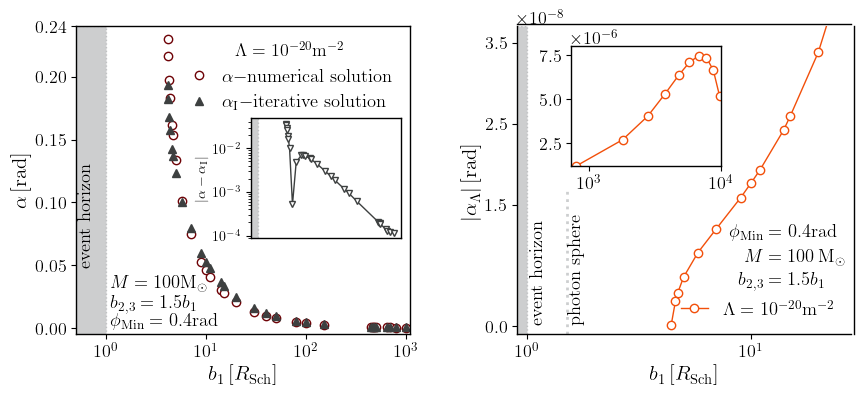

In [8]:
#####
FL0M1N = interp1d(M1L0[0], M1L0[1], kind='quadratic')
FL0M1S = interp1d(M1L0S[0], M1L0S[1], kind='quadratic')
FL0M100N = interp1d(M100L0[0], M100L0[1], kind='quadratic')
FL0M100S = interp1d(M100L0S[0], M100L0S[1], kind='quadratic')

FL20M1N = interp1d(M1Lm20N[0], M1Lm20N[1], kind='quadratic')
FL20M1S = interp1d(M1Lm20S[0], M1Lm20S[1], kind='quadratic')

FL20M100N = interp1d(M100Lm20N[0], M100Lm20N[1], kind='quadratic')
FL20M100S = interp1d(M100Lm20S[0], M100Lm20S[1], kind='quadratic')
######
#part2
FL20M100Npart2 = interp1d(M100Lm20Npart2[0], M100Lm20Npart2[1], kind='quadratic')
FL20M100Spart2 = interp1d(M100Lm20Spart2[0], M100Lm20Spart2[1], kind='quadratic')

FL0M100Npart2 = interp1d(M100L0part2[0], M100L0part2[1], kind='quadratic')
FL0M100Spart2 = interp1d(M100L0Spart2[0], M100L0Spart2[1], kind='quadratic')
#############
Msun = 1.9885e30  # kg 
G = 6.674e-11  # m^3/(kg s^2)
c = 299792458  # m/s
Rsun = 6.96e08  # m

ang = lambda M, G, c, b: 4*G*M/(c**2*b)
fac = 206265
##############
M= 100*Msun
b0 = M100Lm20N[0]*2*G*M/c**2
yval = ang(M, G, c, b0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.32))

#ax[0].plot(M100Lm20N[0], yval)
ax[0].plot(M100Lm20N[0], M100Lm20N[1], marker='o', mfc='white', ls='', 
           c='#6e0206', label=r'$\alpha-$numerical solution')
ax[0].plot(M100Lm20S[0], M100Lm20S[1], marker='^', ls='',
           c='#3d4040', label=r'$\alpha_{\mathrm{I}}-$iterative solution')

left, bottom, width, height = [0.3, 0.35, 0.15, 0.3]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
#ax1.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ptos = M100Lm20N[0]
ax1.plot(ptos, np.abs(FL20M100N(ptos)-FL20M100S(ptos)), marker='v', c='#3d4040', mfc='white',
         markersize=5, ls='-', lw=1)

ax1.axvspan(xmin=0, xmax=1, ymin=-0.1, ymax=1, color='#9c9fa1', ls=':', alpha=0.5)
ax1.yaxis.set_tick_params(labelsize=10)
#ax1.set_xlim(0.5, 1e06)
ax1.set_ylabel(r'$|\alpha-\alpha_{\mathrm{I}}|$%', fontsize=10)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks([])

# Axes limits
ax[0].set_ylim(-5e-03, 0.24)
ax[0].set_xlim(0.5, 1.1e03)

ax[0].axvspan(xmin=0, xmax=1, ymin=-0.1, ymax=1, color='#9c9fa1', ls=':', alpha=0.5)
ax[0].text(x=0.52, y=0.05, s=r'event horizon', rotation='vertical', fontsize='small')

ax[0].set_ylabel(r'$\alpha\, [\mathrm{rad}]$')
ax[0].set_xlabel(r'$b_1\,[R_\mathrm{Sch}]$')

ax[0].set_xscale('log')
ax[0].legend(loc='best',frameon=False, handletextpad=0.5, 
             title=r'$\Lambda = 10^{-20} \mathrm{m}^{-2}$', fontsize='small')

ax[0].text(x=1.1, y=0.002, s=r'$\phi_{\mathrm{Min}}=0.4$rad', fontsize='small')
ax[0].text(x=1.1, y=0.032, s=r'$M=100\mathrm{M}_\odot$',
           fontsize='small', rotation='horizontal')
ax[0].text(x=1.1, y=0.016, s=r'$b_{2,3}=1.5b_1$',
           fontsize='small', rotation='horizontal')

ax[0].set_xticks([1, 10, 100, 1000])
ax[0].set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.24])
####

#ptos = M100Lm20N[0][3:15]
#ax[1].plot(ptos,  np.abs(FL20M1N(ptos)-FL0M1N(ptos)), ls='-', lw=1, mfc='white', marker='o', c='#1151d1',
#           label=r'$M = 1 $')

#ax[1].plot(ptos,  np.abs(FL20M1S(ptos)-FL0M1S(ptos))*1e04, ls='--', lw=1, mfc='white', marker='o', c='#1151d1',
#           label=r'$M = 1 $')

ptos = M100Lm20N[0][3:16]
ax[1].plot(ptos,  np.abs(FL20M100S(ptos)-FL0M100S(ptos)), ls='-', lw=1, mfc='white', marker='o', 
           c='#f24f0a',
        label=r'$\Lambda = 10^{-20} \mathrm{m}^{-2}$')

ax[1].axvspan(xmin=0, xmax=1, ymin=-0.1, ymax=1, color='#9c9fa1', ls=':', alpha=0.5)

ax[1].axvline(x=3/2, ymin=0, ymax=0.47, color='#9c9fa1', ls=':', alpha=0.5)


ax[1].set_xscale('log')

ax[1].set_yticks([0, 1.5e-08, 2.5e-08, 3.5e-08])
ax[1].set_xticks([1, 10, 30])
ax[1].set_xlim(0.9, 28)
ax[1].set_ylim(-0.1e-08, 3.7e-08)

ax[1].set_ylabel(r'$|\alpha_{\Lambda}|\, [\mathrm{rad}]$')
ax[1].set_xlabel(r'$b_1\,[R_\mathrm{Sch}]$')

ax[1].spines['right'].set_position(('data', 29))
ax[1].spines['top'].set_position(('data', 3.73e-08))

ax[1].legend(loc='lower right', frameon=False, fontsize='small', labelspacing=0.3)

ax[1].text(x=1.02, y=0.05e-08, s=r'event horizon', rotation='vertical', fontsize='small')
ax[1].text(x=1.52, y=0.05e-08, s=r'photon sphere', rotation='vertical', fontsize='small')


ptos = M100L0part2[0]
ptos = np.linspace(M100L0part2[0][0],M100L0part2[0][-1], 10)

left, bottom, width, height = [0.62, 0.53, 0.15, 0.3]  # posición y dimensiones del insert
ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2

ax2.plot(ptos, np.abs(FL20M100Spart2(ptos)-FL0M100Spart2(ptos)), ls='-', lw=1, mfc='white', marker='o', 
           c='#f24f0a')

ax2.set_xscale('log')
ax2.set_xlim(ptos[0]-70, 10000)
ax2.set_ylim(1.2e-06, 8e-06)


ax[1].text(x=8, y=1.1e-08, s=r'$\phi_{\mathrm{Min}}=0.4$rad', fontsize='small')
ax[1].text(x=9.3, y=0.8e-08, s=r'$M=100\,\mathrm{M}_\odot$', fontsize='small', rotation='horizontal')
ax[1].text(x=8.8, y=0.5e-08, s=r'$b_{2,3}=1.5b_1$', fontsize='small', rotation='horizontal')




In [9]:
fig.savefig('Hord2.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )